<a href="https://colab.research.google.com/github/veenqa/garbage-clssification-using-mobilenet/blob/main/garbage_clssification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter dataset path: /content/drive/MyDrive/TrashType_Image_Dataset

📊 Class Distribution:
cardboard: 403 samples
glass: 501 samples
metal: 410 samples
paper: 594 samples
plastic: 484 samples
trash: 137 samples
Found 2529 files belonging to 6 classes.
Using 2024 files for training.
Found 2529 files belonging to 6 classes.
Using 505 files for validation.


/tmp/ipython-input-9-3746755420.py:78: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(


2019640/2019640 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

🚀 Starting model training...
Epoch 1/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.4227 - loss: 1.4936

32/32 ━━━━━━━━━━━━━━━━━━━━ 156s 4s/step - accuracy: 0.4261 - loss: 1.4850 - val_accuracy: 0.6317 - val_loss: 0.9495
Epoch 2/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7251 - loss: 0.7614

32/32 ━━━━━━━━━━━━━━━━━━━━ 105s 3s/step - accuracy: 0.7254 - loss: 0.7599 - val_accuracy: 0.6554 - val_loss: 0.9384
Epoch 3/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 146s 3s/step - accuracy: 0.7883 - loss: 0.5745 - val_accuracy: 0.6535 - val_loss: 0.9516
Epoch 4/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8244 - loss: 0.4635

32/32 ━━━━━━━━━━━━━━━━━━━━ 105s 3s/step - accuracy: 0.8248 - loss: 0.4629 - val_accuracy: 0.6535 - val_loss: 0.9360
Epoch 5/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8595 - loss: 0.3857

32/32 ━━━━━━━━━━━━━━━━━━━━ 163s 4s/step - accuracy: 0.8599 - loss: 0.3851 - val_accuracy: 0.7050 - val_loss: 0.8401
Epoch 6/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8906 - loss: 0.3071

32/32 ━━━━━━━━━━━━━━━━━━━━ 142s 4s/step - accuracy: 0.8908 - loss: 0.3068 - val_accuracy: 0.7465 - val_loss: 0.7526
Epoch 7/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9269 - loss: 0.2458

32/32 ━━━━━━━━━━━━━━━━━━━━ 125s 3s/step - accuracy: 0.9270 - loss: 0.2457 - val_accuracy: 0.7604 - val_loss: 0.7094
Epoch 8/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9440 - loss: 0.2024

32/32 ━━━━━━━━━━━━━━━━━━━━ 159s 4s/step - accuracy: 0.9441 - loss: 0.2022 - val_accuracy: 0.7663 - val_loss: 0.7015
Epoch 9/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 123s 3s/step - accuracy: 0.9593 - loss: 0.1671 - val_accuracy: 0.7564 - val_loss: 0.7477
Epoch 10/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 105s 3s/step - accuracy: 0.9699 - loss: 0.1411 - val_accuracy: 0.7564 - val_loss: 0.8159
Epoch 11/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 105s 3s/step - accuracy: 0.9740 - loss: 0.1242 - val_accuracy: 0.7426 - val_loss: 0.8532
Epoch 12/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 105s 3s/step - accuracy: 0.9789 - loss: 0.1094 - val_accuracy: 0.7426 - val_loss: 0.8318
Epoch 13/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 144s 3s/step - accuracy: 0.9853 - loss: 0.0952 - val_accuracy: 0.7446 - val_loss: 0.8384
Fine-tune model? (y/n): y

🔧 Starting fine-tuning...
Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 896s 27s/step - accuracy: 0.5204 - loss: 1.5814 - val_accuracy: 0.6891 - val_loss: 0.9031
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 921s 29s/step - accuracy: 0.

✅ Model trained and saved as garbage_classifier_final.h5


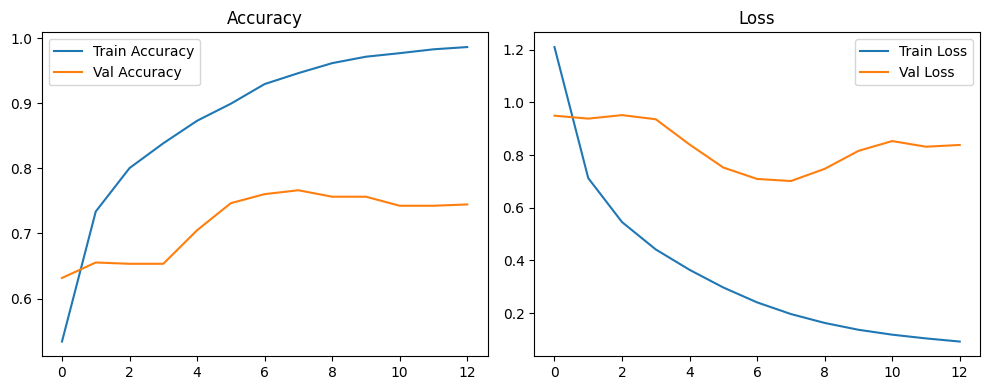

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks, optimizers
import numpy as np
import pathlib
import os
import matplotlib.pyplot as plt
from sklearn.utils import class_weight
from tensorflow.keras.applications import MobileNetV2


tf.keras.mixed_precision.set_global_policy('mixed_float16')


def load_and_prepare_dataset(dataset_path, img_size=(150, 150), batch_size=64, val_split=0.2):
    data_dir = pathlib.Path(dataset_path)
    class_names = sorted([f.name for f in data_dir.glob("*") if f.is_dir()])


    class_counts = {}
    for cls in class_names:
        class_counts[cls] = len(list((data_dir/cls).glob("*")))

    print("\n📊 Class Distribution:")
    for cls, count in class_counts.items():
        print(f"{cls}: {count} samples")


    y = []
    for cls_idx, cls_name in enumerate(class_names):
        y.extend([cls_idx] * class_counts[cls_name])
    class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y), y=y)
    class_weights = dict(enumerate(class_weights))


    train_ds = tf.keras.utils.image_dataset_from_directory(
        data_dir, validation_split=val_split, subset="training", seed=42,
        image_size=img_size, batch_size=batch_size, label_mode='categorical'
    )
    val_ds = tf.keras.utils.image_dataset_from_directory(
        data_dir, validation_split=val_split, subset="validation", seed=42,
        image_size=img_size, batch_size=batch_size, label_mode='categorical'
    )


    aug = tf.keras.Sequential([
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.05),
        layers.RandomZoom(0.05),
    ])

    def preprocess(x, y):
        x = tf.cast(x, tf.float32) / 255.0
        x = aug(x, training=True)
        return x, y

    AUTOTUNE = tf.data.AUTOTUNE


    train_ds = (
        train_ds
        .map(preprocess, num_parallel_calls=AUTOTUNE)
        .cache()
        .prefetch(buffer_size=AUTOTUNE)
    )

    val_ds = (
        val_ds
        .map(lambda x, y: (tf.cast(x, tf.float32)/255.0, y), num_parallel_calls=AUTOTUNE)
        .cache()
        .prefetch(buffer_size=AUTOTUNE)
    )

    return train_ds, val_ds, class_names, class_weights


def build_model(input_shape=(150, 150, 3), num_classes=6):

    base_model = MobileNetV2(
        input_shape=input_shape,
        include_top=False,
        weights='imagenet',
        pooling='avg',
        alpha=0.35
    )
    base_model.trainable = False


    inputs = tf.keras.Input(shape=input_shape)
    x = base_model(inputs, training=False)
    x = layers.Dense(64, activation='relu')(x)  # Smaller head
    outputs = layers.Dense(num_classes, activation='softmax', dtype='float32')(x)

    return models.Model(inputs, outputs)


def train_model(dataset_path):
    train_ds, val_ds, class_names, class_weights = load_and_prepare_dataset(dataset_path)
    model = build_model(num_classes=len(class_names))


    lr_schedule = optimizers.schedules.ExponentialDecay(
        initial_learning_rate=0.001,
        decay_steps=500,
        decay_rate=0.9
    )

    model.compile(
        optimizer=optimizers.Adam(lr_schedule),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )


    callbacks_list = [
        callbacks.EarlyStopping(patience=5, restore_best_weights=True, monitor='val_accuracy'),
        callbacks.ModelCheckpoint("best_model.h5", save_best_only=True)
    ]

    print("\n🚀 Starting model training...")
    history = model.fit(
        train_ds,
        epochs=15,
        validation_data=val_ds,
        callbacks=callbacks_list,
        class_weight=class_weights
    )

    #
    if input("Fine-tune model? (y/n): ").strip().lower() == 'y':
        print("\n🔧 Starting fine-tuning...")
        base_model = model.layers[1]
        base_model.trainable = True

        model.compile(
            optimizer=optimizers.Adam(0.0001),
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )

        model.fit(
            train_ds,
            epochs=5,
            validation_data=val_ds
        )

    model.save("garbage_classifier_final.h5")
    print("✅ Model trained and saved as garbage_classifier_final.h5")


    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss')
    plt.legend()

    plt.tight_layout()
    plt.savefig('training_history.png')
    plt.show()

if __name__ == "__main__":
    dataset_path = input("Enter dataset path: ").strip()
    train_model(dataset_path)

Enter path to trained model (.h5): garbage_classifier_final.h5
Enter path to evaluation dataset: /content/drive/MyDrive/garbage validate

📥 Loading model from: garbage_classifier_final.h5
📂 Loading data from: /content/drive/MyDrive/garbage validate
Found 73 files belonging to 6 classes.

📋 Classification Report:

              precision    recall  f1-score   support

    carboard       1.00      0.33      0.50        12
       glass       0.69      0.82      0.75        11
       metal       0.93      1.00      0.97        14
       paper       0.52      1.00      0.69        12
     plastic       0.71      0.83      0.77        12
       trash       1.00      0.33      0.50        12

    accuracy                           0.73        73
   macro avg       0.81      0.72      0.70        73
weighted avg       0.82      0.73      0.70        73



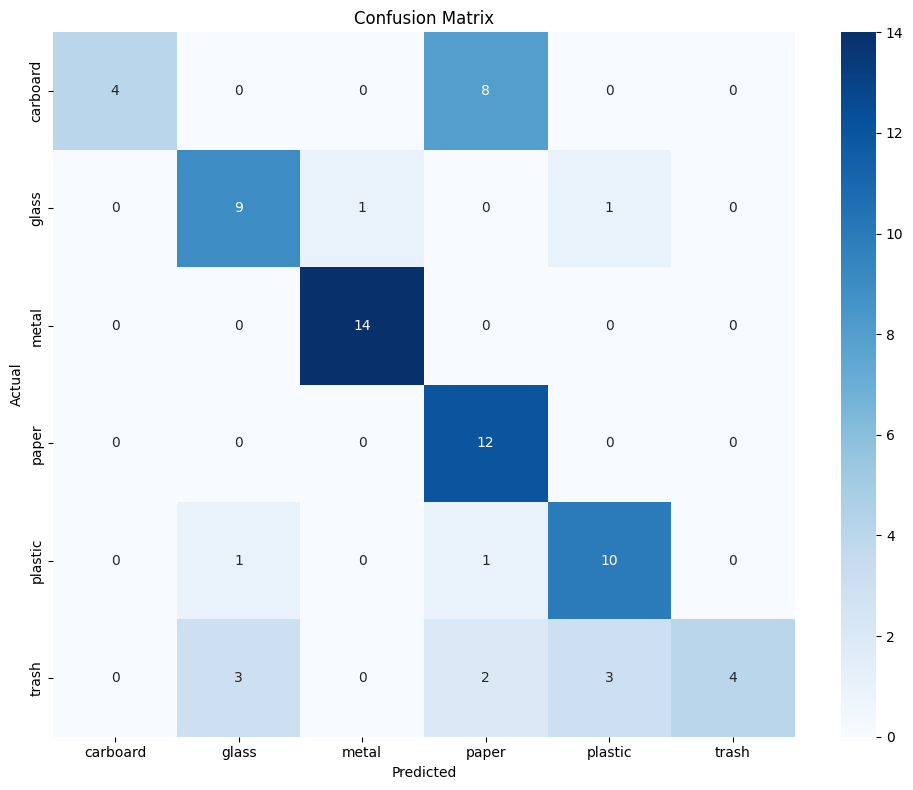

✅ Confusion matrix saved as 'confusion_matrix.png'
Found 73 files belonging to 6 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


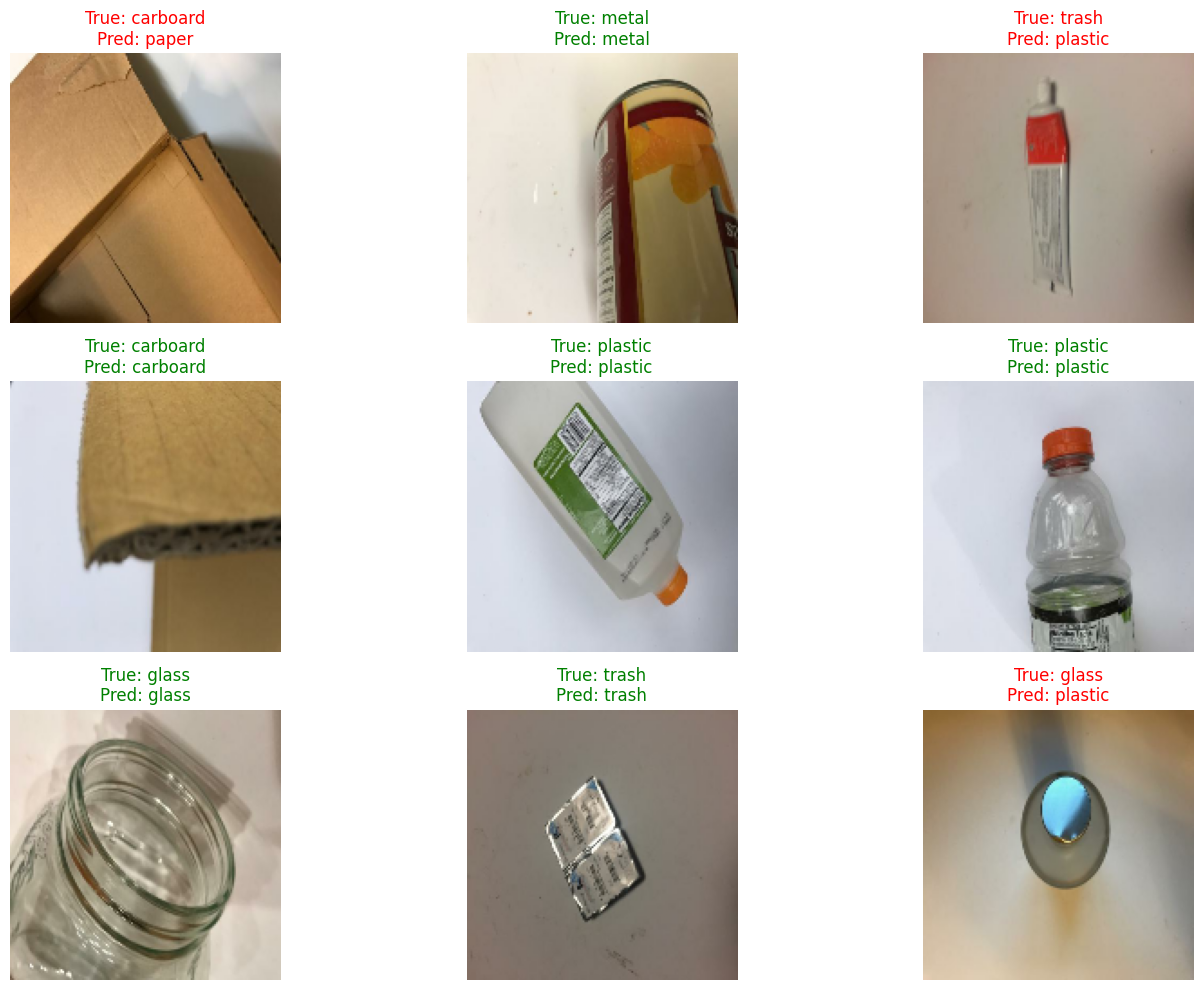

✅ Sample predictions saved as 'sample_predictions.png'


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib
from sklearn.metrics import classification_report, confusion_matrix

# Define a custom Cast layer to handle the mixed precision casting
class CustomCast(tf.keras.layers.Layer):
    def __init__(self, dtype=None, **kwargs):
        super(CustomCast, self).__init__(dtype=dtype, **kwargs)
        # The dtype is now handled by the super class

    def call(self, inputs):
        # The casting is implicitly handled by the layer's dtype
        return tf.cast(inputs, self.dtype)


    def get_config(self):
        config = super(CustomCast, self).get_config()
        # The dtype is already included in the super config
        return config


# ============ Load Dataset ============
def load_dataset(dataset_path, img_size=(150, 150), batch_size=32): # Changed img_size to (150, 150)
    data_dir = pathlib.Path(dataset_path)
    class_names = sorted([f.name for f in data_dir.glob("*") if f.is_dir()])

    ds = tf.keras.utils.image_dataset_from_directory(
        dataset_path,
        image_size=img_size,
        batch_size=batch_size,
        label_mode='categorical'
    )

    ds = ds.map(lambda x, y: (x / 255.0, y)).prefetch(tf.data.AUTOTUNE)
    return ds, class_names

# ============ Evaluate Model ============
def evaluate_model(model_path, dataset_path):
    print(f"\n📥 Loading model from: {model_path}")
    # Include the custom Cast layer in custom_objects
    model = tf.keras.models.load_model(model_path, compile=False, custom_objects={'Cast': CustomCast})

    print(f"📂 Loading data from: {dataset_path}")
    val_ds, class_names = load_dataset(dataset_path, img_size=(150, 150)) # Changed img_size to (150, 150)

    y_true, y_pred = [], []

    for images, labels in val_ds:
        predictions = model.predict(images, verbose=0)
        y_pred.extend(tf.argmax(predictions, axis=1).numpy())
        y_true.extend(tf.argmax(labels, axis=1).numpy())

    # Classification Report
    print("\n📋 Classification Report:\n")
    print(classification_report(y_true, y_pred, target_names=class_names))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.savefig("confusion_matrix.png")
    plt.show()

    print("✅ Confusion matrix saved as 'confusion_matrix.png'")

# ============ Sample Prediction (Optional) ============
def show_sample_predictions(model_path, dataset_path):
    # Include the custom Cast layer in custom_objects
    model = tf.keras.models.load_model(model_path, compile=False, custom_objects={'Cast': CustomCast})
    val_ds, class_names = load_dataset(dataset_path, img_size=(150, 150)) # Changed img_size to (150, 150)

    for images, labels in val_ds.take(1):
        plt.figure(figsize=(15, 10))
        for i in range(min(9, len(images))):
            ax = plt.subplot(3, 3, i + 1)
            img = images[i].numpy()
            label = tf.argmax(labels[i]).numpy()
            pred = tf.argmax(model.predict(tf.expand_dims(images[i], axis=0)), axis=1).numpy()[0]
            plt.imshow(img)
            title_color = 'green' if label == pred else 'red'
            plt.title(f"True: {class_names[label]}\nPred: {class_names[pred]}", color=title_color)
            plt.axis('off')
        plt.tight_layout()
        plt.savefig("sample_predictions.png")
        plt.show()
        print("✅ Sample predictions saved as 'sample_predictions.png'")
        break

# ============ Run from Terminal ============
if __name__ == "__main__":
    model_path = input("Enter path to trained model (.h5): ").strip()
    dataset_path = input("Enter path to evaluation dataset: ").strip()

    evaluate_model(model_path, dataset_path)
    show_sample_predictions(model_path, dataset_path)